In [2]:
import os

# Khởi tạo đường dẫn
base_path = 'd:\DoAn_HocSau\kaggle\raw-img'

# Kiểm tra cấu trúc thư mục
if not os.path.exists(base_path):
    print("Thư mục không tồn tại!")
else:
    print("Danh sách thư mục trong My Drive:", os.listdir(base_path))

Thư mục không tồn tại!


In [3]:
data_path = r"D:\DoAn_HocSau\kaggle\raw-img"  # Thêm 'r' để tránh xử lý thoát ký tự
print(f"Giá trị của data_path: {data_path}")
#Lấy danh sách lớp từ đường dẫn dữ liệu
class_names = sorted(os.listdir(data_path))
num_classes = len(class_names)

print("Class Names:\n", class_names)
print("Number of Classes:", num_classes)

Giá trị của data_path: D:\DoAn_HocSau\kaggle\raw-img
Class Names:
 ['cane', 'cavallo', 'elefante', 'farfalla', 'gallina', 'gatto', 'mucca', 'pecora', 'ragno', 'scoiattolo']
Number of Classes: 10


In [4]:
class Data:
    def __init__(self):
        self.path = ''

# Khởi tạo đối tượng Data
data = Data()
data_path = r"D:\DoAn_HocSau\kaggle\raw-img"

print(data.path)  # Kiểm tra đường dẫn

In [112]:
import os
import shutil
import keras
import numpy as np
from glob import glob
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import seaborn as sns
import matplotlib.pyplot as plt
from keras import Sequential
from keras.layers import Dense, GlobalAvgPool2D as GAP, Dropout
from keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.applications import InceptionV3, ResNet152V2

In [119]:
Image_Width=128
Image_Height=128
Image_Size=(Image_Width,Image_Height)
Image_Channels=3

In [6]:
#Lấy số lượng mẫu trong lớp
class_sizes = []
for name in class_names:
    class_size = len(os.listdir(os.path.join(data_path, name)))
    class_sizes.append(class_size)

print("Class Distribution:\n", class_sizes)

Class Distribution:
 [4863, 2623, 1446, 2112, 3098, 1668, 1866, 1820, 4821, 1862]


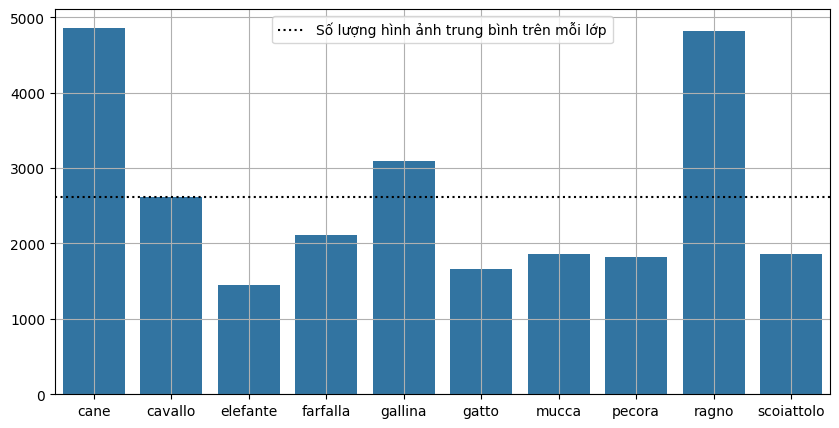

In [7]:
# Vẽ biểu đồ phân phối lớp
plt.figure(figsize=(10, 5))
sns.barplot(x=class_names, y=class_sizes)
plt.grid()
plt.axhline(np.mean(class_sizes), color='black', linestyle=':', label="Số lượng hình ảnh trung bình trên mỗi lớp")
plt.legend()
plt.show()

In [8]:
#Tạo thư mục dữ liệu mẫu
sampled_data_path = './sampled-data'
if not os.path.exists(sampled_data_path):
    os.mkdir(sampled_data_path)

sample_percent = 0.1
class_names_dict = {
    'cane': 'dog',
    'cavallo': 'horse',
    'elefante': 'elephant',
    'farfalla': 'butterfly',
    'gallina': 'chicken',
    'gatto': 'cat',
    'mucca': 'cow',
    'pecora': 'sheep',
    'ragno': 'spider',
    'scoiattolo': 'squirrel',
}

for class_name in os.listdir(data_path):
    class_path = os.path.join(data_path, class_name)
    class_name_en = class_names_dict[class_name]
    sampled_class_path = os.path.join(sampled_data_path, class_name_en)
    if not os.path.exists(sampled_class_path):
        os.mkdir(sampled_class_path)
    
    image_files = os.listdir(class_path)
    num_images = int(len(image_files) * sample_percent)
    sampled_images = np.random.choice(image_files, size=num_images, replace=False)
    
    for image_name in sampled_images:
        src_path = os.path.join(class_path, image_name)
        dst_path = os.path.join(sampled_class_path, image_name)
        shutil.copyfile(src_path, dst_path)

In [11]:
#Tạo kiến trúc mạng neural
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,\
     Dropout,Flatten,Dense,Activation,\
     BatchNormalization

model=Sequential()

model.add(Conv2D(32,(3,3),activation='relu',input_shape=(Image_Width,Image_Height,Image_Channels)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(2,activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='rmsprop',metrics=['accuracy'])

C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [12]:
#Phân tích mô hình
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 126, 126, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 61, 61, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 28, 28, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │    12,845,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 512)            │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │         1,026 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,942,786 (49.37 MB)

 Trainable params: 12,941,314 (49.37 MB)

 Non-trainable params: 1,472 (5.75 KB)

In [13]:
#Định nghĩa callbacks và learning rate
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
earlystop = EarlyStopping(patience = 10)
learning_rate_reduction = ReduceLROnPlateau(monitor = 'val_acc',patience = 2,verbose = 1,factor = 0.5,min_lr = 0.00001)
callbacks = [earlystop,learning_rate_reduction]

In [14]:
from tensorflow.keras.applications import ResNet152V2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, GlobalAvgPool2D as GAP, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Đặt số lớp
num_classes = len(class_names)

# Khởi tạo Generator với các biến đổi hình ảnh
data_generator = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=20,
    validation_split=0.2  # Tách 20% dữ liệu cho tập validation
)

# Tạo tập dữ liệu huấn luyện
train_data = data_generator.flow_from_directory(
    sampled_data_path,
    target_size=(256, 256),
    class_mode='categorical',  # Sử dụng 'categorical' cho nhiều lớp
    batch_size=32,
    shuffle=True,
    subset='training'  # Chỉ lấy phần huấn luyện
)

# Tạo tập dữ liệu xác thực
valid_data = data_generator.flow_from_directory(
    sampled_data_path,
    target_size=(256, 256),
    class_mode='categorical',  # Sử dụng 'categorical' cho nhiều lớp
    batch_size=32,
    shuffle=True,
    subset='validation'  # Chỉ lấy phần xác thực
)
#Tạo mô hình
name = "ResNet152V2"
base_model = ResNet152V2(include_top=False, input_shape=(256, 256, 3), weights='imagenet')
base_model.trainable = False

resnet152V2 = Sequential([
    base_model,
    GAP(),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(num_classes, activation='softmax')  # Sử dụng 'softmax' cho nhiều lớp
], name=name)

# Biên dịch mô hình với hàm mất mát phù hợp
resnet152V2.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

cbs = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ModelCheckpoint(name + ".h5", save_best_only=True)
]

# Huấn luyện mô hình
resnet152V2.fit(train_data, validation_data=valid_data, epochs=50, callbacks=cbs)

Found 3965 images belonging to 10 classes.
Found 989 images belonging to 10 classes.


C:\Users\Admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 8s/step - accuracy: 0.7296 - loss: 0.8575

124/124 ━━━━━━━━━━━━━━━━━━━━ 1244s 10s/step - accuracy: 0.7303 - loss: 0.8551 - val_accuracy: 0.8837 - val_loss: 0.3437
Epoch 2/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 7s/step - accuracy: 0.8977 - loss: 0.3188

124/124 ━━━━━━━━━━━━━━━━━━━━ 1112s 9s/step - accuracy: 0.8976 - loss: 0.3190 - val_accuracy: 0.8817 - val_loss: 0.3415
Epoch 3/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.8966 - loss: 0.2975

124/124 ━━━━━━━━━━━━━━━━━━━━ 894s 7s/step - accuracy: 0.8966 - loss: 0.2975 - val_accuracy: 0.8948 - val_loss: 0.3075
Epoch 4/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 6s/step - accuracy: 0.9207 - loss: 0.2476

124/124 ━━━━━━━━━━━━━━━━━━━━ 903s 7s/step - accuracy: 0.9206 - loss: 0.2477 - val_accuracy: 0.9110 - val_loss: 0.2678
Epoch 5/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 910s 7s/step - accuracy: 0.9218 - loss: 0.2221 - val_accuracy: 0.8847 - val_loss: 0.3226
Epoch 6/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 910s 7s/step - accuracy: 0.9379 - loss: 0.1904 - val_accuracy: 0.9090 - val_loss: 0.2873
Epoch 7/50
124/124 ━━━━━━━━━━━━━━━━━━━━ 922s 7s/step - accuracy: 0.9434 - loss: 0.1607 - val_accuracy: 0.9050 - val_loss: 0.2875


In [15]:
# Lưu mô hình sau khi huấn luyện
model_save_path = "resnet152v2_model.h5"  # Đặt tên cho file lưu mô hình
resnet152V2.save(model_save_path)

print(f"Mô hình đã được lưu tại: {model_save_path}")

Mô hình đã được lưu tại: resnet152v2_model.h5


In [106]:
#Chuẩn bị dự liệu thử nghiệm
import pandas as pd
test_filenames = os.listdir(r"D:\DoAn_HocSau\sampled-data")  # Đường dẫn đến thư mục chứa dữ liệu thử nghiệm
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]  # Số lượng mẫu thử nghiệm

In [107]:
print(f"Số lượng mẫu thử nghiệm (nb_samples): {nb_samples}")

Số lượng mẫu thử nghiệm (nb_samples): 10


In [ ]:
# Xây dựng hàm để dự đoán cho 1 ảnh
def pred_single(path):
    img = Image.open(path)  # Sử dụng PIL để mở ảnh
    img = img.resize(Image_Size)  # Đặt kích thước ảnh
    img_array = np.array(img) / 255.0  # Chuẩn hóa ảnh
    img_array = np.expand_dims(img_array, axis=0)  # Thêm chiều cho batch
    
    # Tạo hàm dự đoán ( Đưa ra dự đoán )
    predictions = resnet152V2.predict(img_array)  # Sử dụng mô hình đã được huấn luyện
    # Trích xuất lớp có xác suất cao nhất
    predicted_class = np.argmax(predictions)
    
    # Bản đồ tên lớp
    label_map = {0: 'cane', 1: 'cavallo', 2: 'elefante', 3: 'farfalla', 
                 4: 'gallina', 5: 'gatto', 6: 'mucca', 7: 'pecora', 
                 8: 'ragno', 9: 'scoiattolo'}
    
    pred = label_map[predicted_class]  # Lấy tên lớp dự đoán
    return [img, pred]

In [124]:
#Kiểm tra trên dữ liệu mới
# Định nghĩa kết quả dự đoán
results = {
    0: 'cane',         # dog
    1: 'cavallo',      # horse
    2: 'elefante',     # elephant
    3: 'farfalla',     # butterfly
    4: 'gallina',      # chicken
    5: 'gatto',        # cat
    6: 'mucca',        # cow
    7: 'pecora',       # sheep
    8: 'ragno',        # spider
    9: 'scoiattolo'    # squirrel
}

from PIL import Image
import numpy as np

# Thay thế "__image_path_TO_custom_image" bằng đường dẫn tới ảnh thử nghiệm của bạn
im = Image.open(r"D:\DoAn_HocSau\sampled-data\butterfly")
im = im.resize(Image_Size)  # Đặt kích thước ảnh
im = np.expand_dims(im, axis=0)  # Thêm chiều cho batch
im = np.array(im) / 255  # Chuẩn hóa ảnh

# Dự đoán
pred = model.predict(im)  # Dự đoán với mô hình
pred_class = np.argmax(pred, axis=-1)[0]  # Lấy lớp dự đoán

# In kết quả
print(pred_class, results[pred_class])

PermissionError: [Errno 13] Permission denied: 'D:\\DoAn_HocSau\\sampled-data\\butterfly'